In [178]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import random  as rd
from IPython.display import HTML
from matplotlib.colorbar import Colorbar
%matplotlib inline

import matplotlib.gridspec as gridspec
from scipy.interpolate import UnivariateSpline, interp1d

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.minorticks_on()
    ax.tick_params('both', length=8, which='major', labelsize='10')
    ax.tick_params('both',length=3, which='minor')
    ax.grid(True, which='major', ls='dashed', alpha=.5)
    ax.grid(True, which='minor', ls='dashed', alpha=.15)
#     ax.legend(loc='best')

def minimalization():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
colors = [np.array([141,211,199])/255., np.array([190,186,218])/255.,
          np.array([251,128,114])/255., np.array([128,177,211])/255.,
          np.array([253,180,98])/255., np.array([179,222,105])/255.,
          np.array([252,205,229])/255., np.array([217,217,217])/255.,
          np.array([188,128,189])/255.]

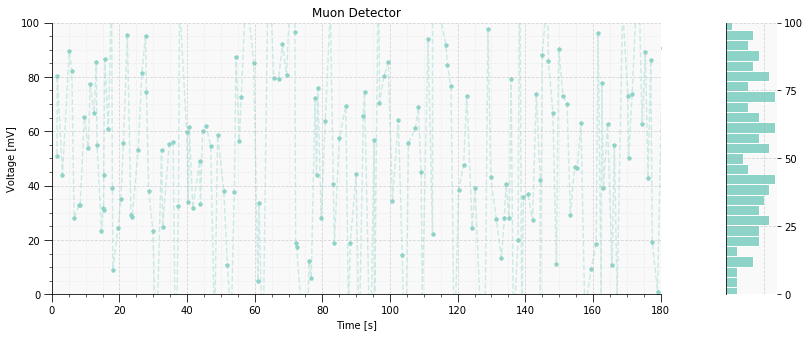

In [220]:
fsize = 180
times = [0]
i = 0
while times[-1] < fsize:
    times.append(times[i] + np.random.normal(1,.5))
    i += 1
counts = np.random.normal(50,40,len(times))

def initial():
    data = np.vstack((0, counts[0])).T
    muons.set_offsets(data)
    
    return muons,

def animate(i):
    j=0
    data = np.vstack((times[i], counts[i])).T
    while j < i and j < len(counts):
        data = np.vstack((data, np.vstack((times[i-j],counts[i-j])).T))
        j += 1
    muons.set_offsets(data)
    muonline.set_data(data[:,0],data[:,1])
    fig.canvas.draw()
    return muons,
    return muonline,

rc('animation', html='html5')

cm = matplotlib.cm.get_cmap('RdYlBu')
height_ratios = [5]
width_ratios = [12,1]
wspace = 0
hspace = 0

fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios),
                       height_ratios=height_ratios, width_ratios=width_ratios)

ax = fig.add_subplot(gs[0, 0])
muons = ax.scatter([], [], marker='p', s=15, color=colors[0])
muonline, = ax.plot([], [], '--', alpha=.4, color=colors[0])
beautification()
ax.update({'title': 'Muon Detector',
            'xlabel': 'Time [s]',
            'ylabel': 'Voltage [mV]'})
ax.set_xlim(0,fsize)
ax.set_ylim(0,100)

ax = fig.add_subplot(gs[0,1])
ax.hist(counts, bins=50, normed=1, orientation='horizontal', color=colors[0], edgecolor='w')
ax.yaxis.set_label_position('right')
ax.set_ylim(0, 100)
ax.set_yticks(np.linspace(0, 100, 5))
ax.set_xticklabels([])
ax.set_ylabel('')
ax.yaxis.tick_right()
ax.xaxis.set_ticks_position('none')
ax.tick_params(axis='y', which='both', left='off', right='on')
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)

anim = animation.FuncAnimation(fig, animate, init_func = initial,
                        frames=len(counts), interval=60, blit=True)
anim